In [151]:
#!pip install tslearn
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import LabelEncoder

from tslearn.clustering import KernelKMeans

import random
import matplotlib.pyplot as plt

In [152]:
seed = 42
n_samples = 500

X, y = make_circles(n_samples=n_samples, factor=0.2, noise=0.05, random_state=seed)

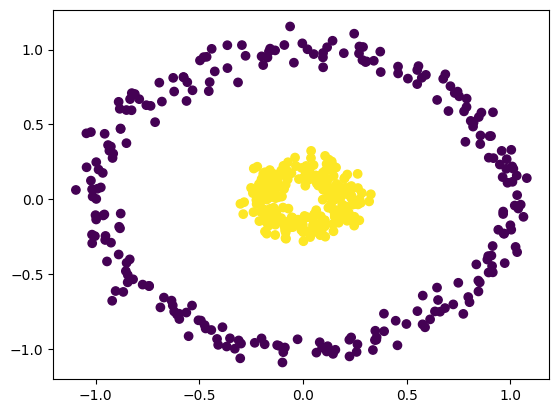

In [153]:
plt.scatter(X[:, 0], X[:, 1], c=y)

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


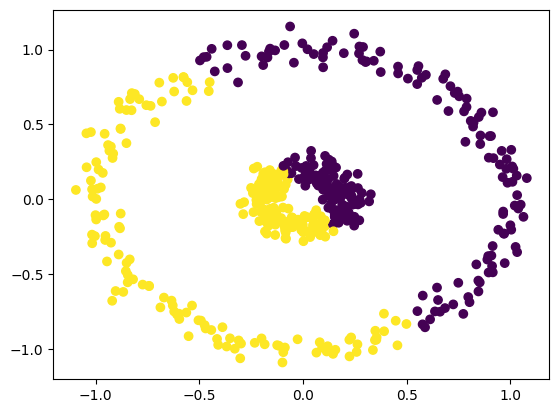

In [154]:
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 500 1-dimensional timeseries
  warnings.warn(


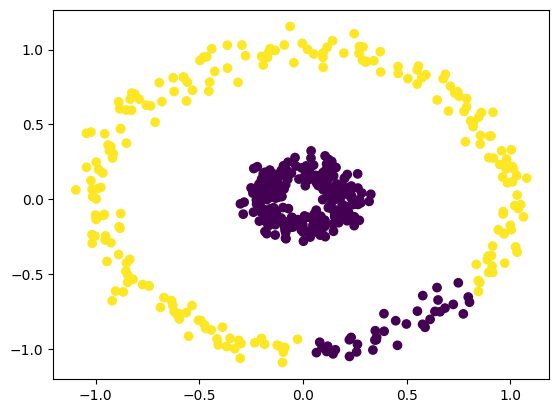

In [155]:
kernel = 'rbf'
kernel = pairwise_kernels(X, X, metric='rbf', gamma=5)
# Should find a way to init the fucking centers!
kernel_kmeans = KernelKMeans(n_clusters=2, n_init=1, kernel='precomputed').fit(kernel)
plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_)
plt.show()

### We want a function that given the kernel and number of clusters to return me the initial partition using the kernel k-means++ algorithm

In [156]:
def calculate_kernel_distances_between_points(center_index, centers_indices, X, kernel_matrix, kernel_distances_between_points):
    for i in range(X.shape[0]):
        if i not in centers_indices: 
            kernel_distances_between_points[center_index, i] = kernel_matrix[center_index, center_index] - 2 * kernel_matrix[center_index, i] + kernel_matrix[i, i]
    return kernel_distances_between_points

def get_initial_center_index(X):
    return random.randint(0, X.shape[0] - 1)

def select_next_center_index(centers_indices, probability_array):
    while(True):
        selected_index = np.random.choice(len(probability_array), p=probability_array)
        if(selected_index not in centers_indices):
            return selected_index

def calculate_points_probabilities_to_be_selected(kernel_distances_between_points):
    return kernel_distances_between_points / np.sum(kernel_distances_between_points)

def calculate_minimum_distances_from_centers_and_partition(centers_indices, kernel_distances_between_points):
    minimum_distances = np.zeros(kernel_distances_between_points.shape[1])
    partition = np.zeros(kernel_distances_between_points.shape[1], dtype=int)

    for i, column in enumerate(kernel_distances_between_points.T):
        nonzero_indices = np.nonzero(column)[0]
        if len(nonzero_indices) > 0:
            partition[i] = nonzero_indices[np.argmin(column[nonzero_indices])]
            minimum_distances[i] = column[partition[i]]
    
    # Make centers partition to their index
    partition[centers_indices] = centers_indices
    
    return minimum_distances, partition

def scale_partition(partition):
    return LabelEncoder().fit_transform(partition)

def calculate_initial_partition(K, X, kernel_matrix):
    centers_indices = []
    n_samples = X.shape[0]
    kernel_distances_between_points = np.zeros((n_samples, n_samples))
    
    i = 0
    while i < K:
        if i != 0:
            centers_indices.append(select_next_center_index(centers_indices, probabilities))
        else:
            centers_indices.append(get_initial_center_index(X))
        print(f"\n {i} Center Finding Procedure")
        print(f"\n centers_indices are: {centers_indices}")
        kernel_distances_between_points = calculate_kernel_distances_between_points(centers_indices[i], centers_indices, X, kernel_matrix, kernel_distances_between_points)
        #print(f"\n new kernel_distances_between_points are: {kernel_distances_between_points}")
        minimum_distances, partition = calculate_minimum_distances_from_centers_and_partition(centers_indices, kernel_distances_between_points)
        print(f"\n minimum_distances are: {minimum_distances} and partition is: {partition}")
        probabilities = calculate_points_probabilities_to_be_selected(minimum_distances)
        i += 1
        
    return scale_partition(partition)



 Start: 0

 0 Center Finding Procedure

 centers_indices are: [195]

 minimum_distances are: [1.99782607 1.99998878 1.99700974 1.9999994  1.99999998 1.99668604
 1.99730971 1.99999999 1.9999844  1.97722451 0.671949   1.99881678
 1.99057895 1.99999976 1.99356151 1.99655189 1.89831593 1.93400849
 1.97050234 1.98902826 1.91159509 1.84997393 1.9727992  1.99564247
 1.99999707 1.95599009 1.94289422 1.94515711 1.99999999 1.99696268
 1.91632141 1.99806396 1.95345859 1.99999054 0.34155517 1.99554927
 1.99804317 1.99998566 1.96003339 1.99996687 1.99494886 1.99999999
 1.9370481  1.99995712 1.92542686 1.99999603 0.15912081 1.15269897
 1.9957964  1.71773445 1.9999994  1.99996736 1.99999999 1.99612979
 1.99932501 1.99989958 1.99999991 1.48263441 1.99215172 1.99999972
 1.92185904 1.94455221 1.99396537 1.93024909 1.99999971 1.99034576
 1.95259019 1.99821787 0.51435001 1.99670555 1.99385903 1.99279689
 1.95489053 1.96810699 1.98835017 1.96439172 1.94669325 1.99998955
 1.97441156 1.93360215 1.99999999 1

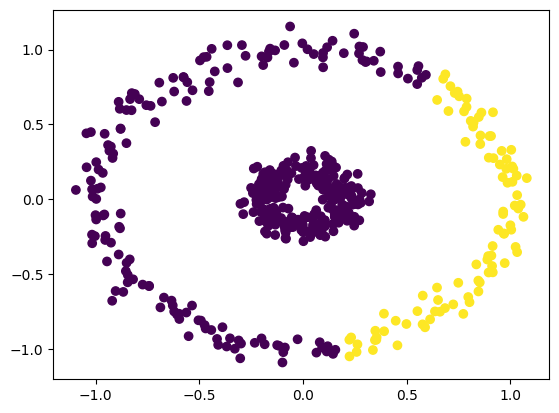


 End: 0

 Start: 1

 0 Center Finding Procedure

 centers_indices are: [182]

 minimum_distances are: [5.96346965e-01 1.99696326e+00 2.71111656e-01 1.87163925e+00
 1.98924634e+00 3.64096438e-02 3.80384387e-01 1.95735924e+00
 1.99531345e+00 3.35185357e-01 1.99771192e+00 1.98103185e+00
 5.34637770e-02 1.99329746e+00 2.77462275e-01 7.35155382e-02
 8.70401614e-01 1.99879039e+00 8.14031882e-01 6.32862234e-02
 7.73915711e-01 1.07905299e+00 9.74735666e-01 6.77362530e-01
 1.99236324e+00 6.05677187e-01 6.03444953e-01 1.98392315e+00
 1.99429085e+00 8.16443064e-01 7.25466089e-01 8.65744170e-01
 4.75529007e-01 1.92420378e+00 1.99713724e+00 5.69540688e-01
 6.66875432e-02 1.99721391e+00 1.97258181e+00 1.99851438e+00
 3.57888683e-02 1.99497660e+00 6.84896417e-01 1.97579341e+00
 1.99642870e+00 1.99624349e+00 1.99797693e+00 1.99897203e+00
 7.49416634e-02 1.99746545e+00 1.99859172e+00 1.92751367e+00
 1.95415059e+00 6.09305999e-03 1.96481354e+00 1.99909629e+00
 1.91180729e+00 1.99702508e+00 1.97171306e+

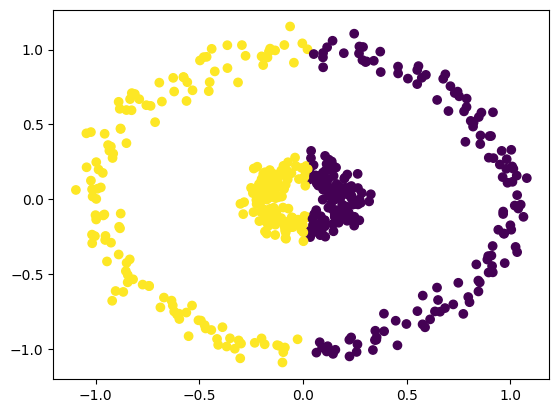


 End: 1

 Start: 2

 0 Center Finding Procedure

 centers_indices are: [136]

 minimum_distances are: [1.99828791 2.         1.99493958 1.96449765 1.99999997 1.9835119
 1.99655328 1.9999922  2.         1.91069792 1.99997095 0.06461325
 1.95469299 1.99999999 1.99418971 1.98769746 1.98439329 1.99999991
 1.99707374 1.97467003 1.97961382 1.98733025 1.99835349 1.99848665
 1.99999999 1.99027784 1.98315203 1.35163361 1.99999999 1.99907937
 1.95724457 1.99926374 1.94871871 1.4485022  1.99991592 1.99791317
 1.97926298 2.         1.12349471 2.         1.98368203 1.99999999
 1.98684041 0.53885886 1.99999968 2.         1.9998602  1.99999545
 1.94228343 1.9999988  2.         1.04562458 1.99994791 1.97564948
 0.01196791 2.         1.99446219 1.99999622 0.46158349 2.
 1.98018415 1.99237339 1.99913724 1.95513297 2.         1.99999999
 1.94793371 1.99999999 1.99676643 1.98718431 1.9968539  1.9982509
 1.99775777 1.99956636 1.99921006 1.99928671 1.99830877 2.
 1.92659994 1.95350263 1.99632064 2.        

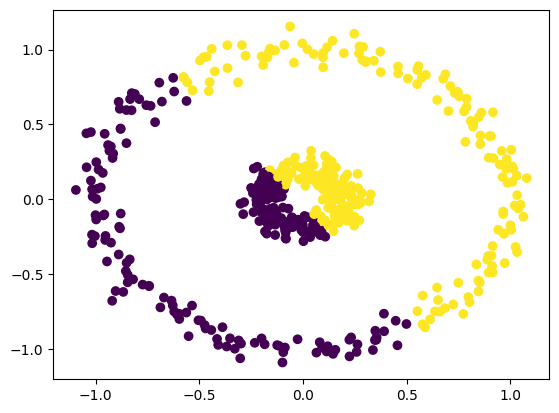


 End: 2

 Start: 3

 0 Center Finding Procedure

 centers_indices are: [249]

 minimum_distances are: [1.98181723e+00 1.99999989e+00 1.96082771e+00 4.48074570e-01
 1.99993755e+00 1.90534650e+00 1.97005966e+00 1.98718014e+00
 1.99999977e+00 1.90012594e+00 1.99999980e+00 1.89451212e+00
 1.88870997e+00 1.99999647e+00 1.97110114e+00 1.92572178e+00
 1.99020540e+00 1.99999999e+00 1.99403670e+00 1.93201200e+00
 1.98640750e+00 1.99415013e+00 1.99631590e+00 1.98893480e+00
 1.99999877e+00 1.98712489e+00 1.98341539e+00 1.99418562e+00
 1.99997912e+00 1.99140899e+00 1.97568068e+00 1.99104133e+00
 1.95661427e+00 3.42923335e-01 1.99999956e+00 1.98537110e+00
 1.85557618e+00 1.99999991e+00 1.98690399e+00 1.99999998e+00
 1.92449580e+00 1.99998654e+00 1.98738572e+00 1.40815501e+00
 1.99999995e+00 1.99999975e+00 1.99999955e+00 1.99999997e+00
 1.80108273e+00 1.99999995e+00 1.99999992e+00 7.64548216e-01
 1.93874834e+00 1.88363891e+00 1.76184646e+00 1.99999999e+00
 1.16363282e+00 1.99999991e+00 1.95348925e+

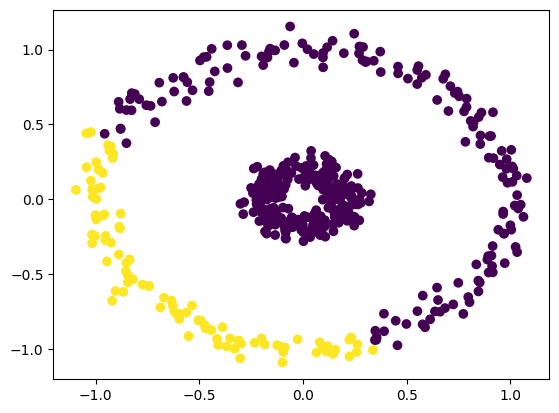


 End: 3

 Start: 4

 0 Center Finding Procedure

 centers_indices are: [405]

 minimum_distances are: [1.38055252 1.99545679 1.27798125 1.99700872 1.99934055 1.27953689
 1.30994761 1.99926017 1.99351916 0.85654412 1.86834034 1.9898533
 1.03021905 1.99848986 1.0363953  1.25348818 0.07634771 1.95155099
 0.53229237 0.90286544 0.12922329 0.0104923  0.63291764 1.20469111
 1.99559972 0.31296456 0.23888113 1.95259767 1.99962582 1.32719711
 0.27033547 1.44094873 0.47768966 1.99544949 1.85034972 1.18219582
 1.43775484 1.9952456  1.94093817 1.99541179 1.14596005 1.99962245
 0.19575559 1.99669572 1.90454116 1.99657218 1.88502512 1.92329382
 1.32230757 1.89056049 1.99901542 1.99320109 1.99944792 1.25851283
 1.98744382 1.99483814 1.99868813 1.86275673 1.97046689 1.99924219
 0.15783386 0.24098692 1.15600137 0.32640644 1.99900663 1.97316968
 0.47545125 1.97836868 1.92014659 1.26893243 1.06611514 1.04800233
 0.43465081 0.8305806  0.98427166 0.70530018 0.43804765 1.99470193
 0.76707631 0.34820771 1.99

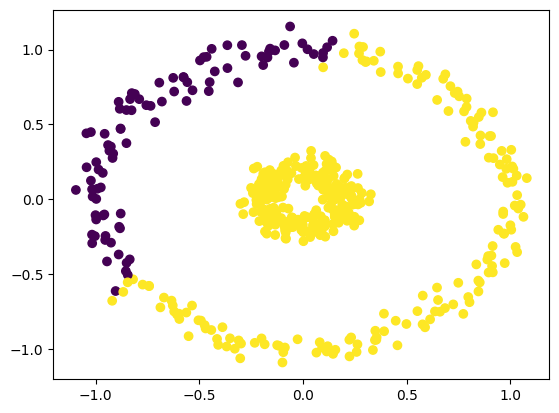


 End: 4

 Start: 5

 0 Center Finding Procedure

 centers_indices are: [62]

 minimum_distances are: [0.18397466 1.91863447 0.36825498 1.99060997 1.94660042 0.76021261
 0.28540406 1.96660644 1.89056885 1.29915333 1.99250381 1.99943064
 1.02989099 1.91885322 0.28175688 0.63971395 0.96325963 1.98015246
 0.25923681 0.77267737 0.98322994 1.07931442 0.21352055 0.04942655
 1.87349976 0.5709325  0.79326519 1.9987928  1.96352949 0.05039076
 1.20011629 0.11140233 1.14234341 1.99743519 1.99317233 0.09110211
 0.96488259 1.92206519 1.99800679 1.94775556 0.67838243 1.96348251
 0.75290424 1.99946448 1.95215391 1.91376231 1.99627854 1.99473006
 1.22099644 1.97717939 1.96058522 1.99765002 1.98298056 0.88552714
 1.99888213 1.96364854 1.99091239 1.98036802 1.99866972 1.96234521
 0.93471736 0.58682219 0.         1.17186943 1.94977748 1.97091218
 1.15123459 1.9436455  1.99874017 0.66460695 0.13294369 0.03403963
 0.38459572 0.41041004 0.05192374 0.36962703 0.45548994 1.89951255
 1.22402423 1.17351354 1.99

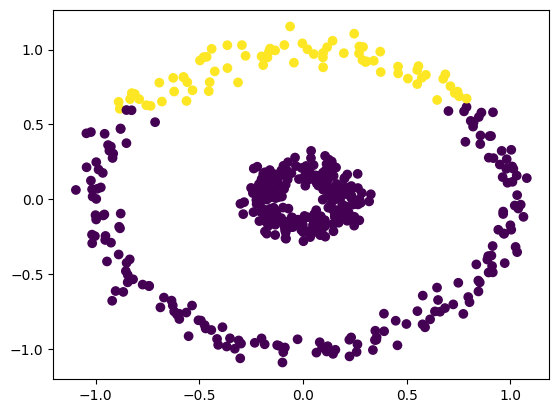


 End: 5

 Start: 6

 0 Center Finding Procedure

 centers_indices are: [36]

 minimum_distances are: [0.55381053 1.9967714  0.25166849 1.81186753 1.98074034 0.036303
 0.35097179 1.91627558 1.99499957 0.60032848 1.99909172 1.98696649
 0.21808242 1.99009947 0.35506834 0.07511669 1.15702718 1.9993936
 1.00829352 0.2346725  1.07237508 1.34146584 1.14215723 0.70843421
 1.99049145 0.86839625 0.89497726 1.99162663 1.98967115 0.81767601
 1.0374867  0.83053965 0.78344956 1.9158128  1.99887504 0.60153737
 0.         1.99710821 1.98477385 1.99861169 0.09416882 1.99106363
 0.96882003 1.97836027 1.99808548 1.99562567 1.99923848 1.99959696
 0.13945844 1.99882017 1.99823021 1.92713191 1.90942566 0.03501121
 1.97348648 1.99925005 1.85289614 1.99867508 1.98241079 1.99797053
 1.0189442  1.00894338 0.96488259 0.95574013 1.99656605 1.99932675
 0.79303485 1.99859915 1.99916226 0.06393108 0.531989   0.76579398
 1.21507054 1.50980109 1.13556296 1.42502361 1.33255627 1.99534493
 0.594957   0.93537486 1.96088

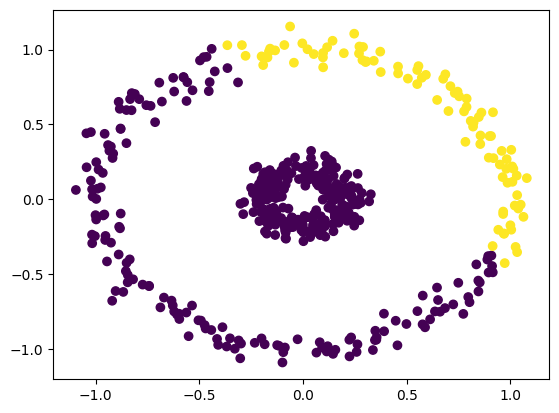


 End: 6

 Start: 7

 0 Center Finding Procedure

 centers_indices are: [417]

 minimum_distances are: [1.84511706 1.97096289 1.89666451 1.99173512 0.43468874 1.93928609
 1.87896934 0.80384472 1.96159802 1.99447542 1.99999991 1.99999976
 1.98147624 1.48427808 1.93611535 1.93114519 1.99654525 1.99999585
 1.97926928 1.97541386 1.99627477 1.99790303 1.97718985 1.89593315
 1.82651085 1.98884321 1.99307993 1.99999995 0.70551493 1.86500976
 1.99740453 1.82184931 1.9954485  1.99988357 1.99999993 1.90078022
 1.9338898  1.97759059 1.99999985 1.99406432 1.9505046  0.84416279
 1.99321738 1.99999745 1.99998227 1.93004207 1.99999998 1.99999993
 1.97675218 1.99999813 1.92813684 1.99995993 1.5103085  1.95472977
 1.99999883 1.99862079 1.9683261  1.99999907 1.99999975 1.88216374
 1.99557442 1.9908285  1.91559146 1.99684013 1.80883779 1.99996731
 1.99558994 1.99964111 2.         1.93095312 1.92438615 1.92733645
 1.98679381 1.98382031 1.95071691 1.98429845 1.98926389 1.95549039
 1.99398016 1.99673101 1.9

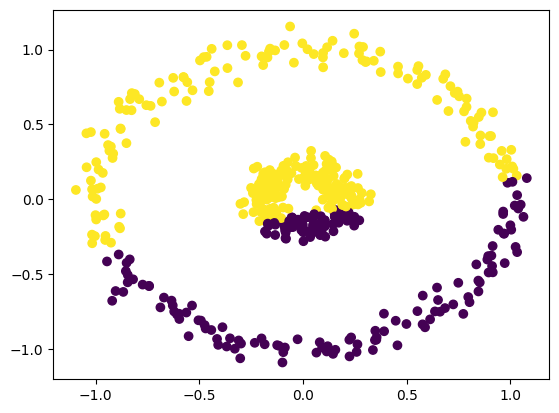


 End: 7

 Start: 8

 0 Center Finding Procedure

 centers_indices are: [197]

 minimum_distances are: [1.78006579 1.4731409  1.88215117 1.99966434 0.61887068 1.94957957
 1.85051074 1.83957423 1.38847759 1.99459462 1.99999505 1.99999996
 1.98370853 0.24292521 1.90930791 1.93679822 1.99048808 1.99953818
 1.93878105 1.97299681 1.9909875  1.99293545 1.92191882 1.80565314
 0.70723513 1.9736637  1.98481713 1.99999996 0.61965237 1.7405762
 1.99504776 1.6854798  1.99330188 1.99999448 1.99999716 1.8307471
 1.95701208 1.54649878 1.99999989 1.7994852  1.95245713 0.54949165
 1.98342019 1.99999984 1.99864627 1.15416791 1.99999916 1.99999441
 1.98549513 1.99984653 1.17722617 1.99999754 1.96635299 1.96468327
 1.99999983 1.92537105 1.99882064 1.99993322 1.99999991 0.98751549
 1.98966501 1.97474041 1.79073943 1.99442631 0.74259161 1.99667549
 1.99349662 1.97632174 1.99999994 1.93834209 1.87289352 1.84579878
 1.95090495 1.91153583 1.84252062 1.92353881 1.95383718 1.33381615
 1.99351369 1.99439188 1.999

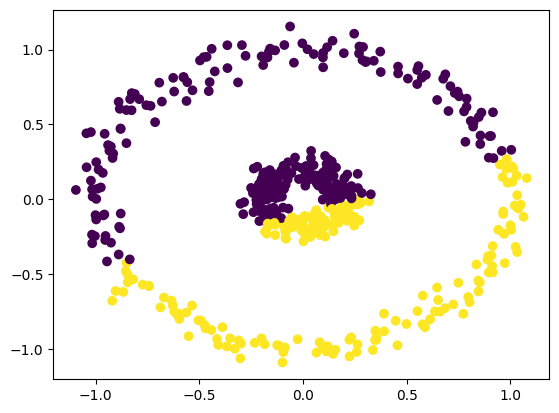


 End: 8

 Start: 9

 0 Center Finding Procedure

 centers_indices are: [119]

 minimum_distances are: [1.98428407 1.81974815 1.99131489 1.99999996 1.9997761  1.99670472
 1.98910852 1.99999753 1.81699634 1.99758612 1.89449094 1.99999996
 1.99722001 1.9942689  1.98575416 1.99550953 1.96846255 0.52030289
 1.93432391 1.99431799 1.97645751 1.95762633 1.90710588 1.97031388
 1.95562331 1.96738008 1.97682745 1.99999729 1.99976806 1.9680236
 1.98894634 1.97377482 1.99304307 1.99999999 1.94402577 1.97611501
 1.99835102 1.78411696 1.99999712 1.58508585 1.99526335 1.99967242
 1.96987616 2.         0.36434622 1.91670158 1.97592457 1.81388167
 1.99890759 1.15237856 1.96470896 1.99999998 1.9999997  1.99743456
 1.99999994 1.24899927 1.99999996 1.47376058 1.99999957 1.98129291
 1.97699096 1.95549728 1.94472783 1.99025251 1.98580344 0.05251715
 1.99309206 0.37241995 1.99907241 1.9958402  1.97764912 1.96135717
 1.90196207 1.77659061 1.90952785 1.8218269  1.87293308 1.85114513
 1.99671486 1.99081879 2.  

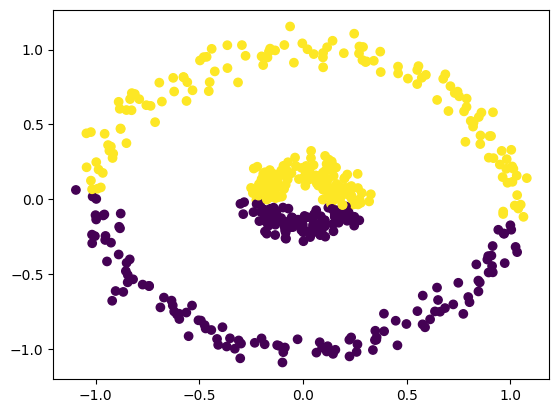


 End: 9


In [157]:
def kernel_kmeans_pp(X, K, kernel_matrix, n_init=10):
    for i in range(n_init):
        
        print(f"\n Start: {i}")
        partition = calculate_initial_partition(K, X, kernel_matrix)
        plt.scatter(X[:, 0], X[:, 1], c = partition)
        plt.show()
        print(f"\n End: {i}")
K = 2
gaussian_kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=5)
kernel_matrix = gaussian_kernel_matrix
kernel_kmeans_pp(X, 2, kernel_matrix)